In [1]:
%matplotlib inline

In [2]:
#from __future__ import division
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

In [3]:
# Sample titles with corresponding barcodes
samples = {
    's9': ['ATCACG', 'ACAGTG'],
    's9+bcm': ['CGATGT', 'GCCAAT'],
    's17': ['TTAGGC', 'GATCAG'],
    }

# Barcodes
barcodes = ['ATCACG', 'ACAGTG', 'CGATGT', 'GCCAAT', 'TTAGGC', 'GATCAG']

In [4]:
offsets = [150,200,300]
winsizes = [50,80,100,200]
output_tpl = '../results/redux/dfa_mp.offset_{}.win_{}.csv'

output = []

for offset in offsets:
    for winsize in winsizes:
        df = pd.DataFrame.from_csv(output_tpl.format(offset, winsize))
        df['win'] = winsize
        df['offset'] = offset
        output.append(df)
        
dfa = pd.concat(output)

In [5]:
dfa['UTR_length'] = dfa['end_x'] - dfa['start_x']
dfa

,TSS,end_x,start_x,gene,strand_x,end_y,start_y,strand_y,strand,ratio_ATCACG,ratio_ACAGTG,ratio_CGATGT,ratio_GCCAAT,win,offset,UTR_length
0,148,190,148,thrL,+,255.0,190.0,+,+,3.000000,2.784355,0.911828,3.178117,50,150,42
1,148,190,148,thrL,+,255.0,190.0,+,+,3.000000,2.784355,0.911828,3.178117,50,150,42
2,5030,5234,5030,yaaX,+,5530.0,5234.0,+,+,4.576923,6.983333,1.264901,1.436242,50,150,204
3,6587,6587,6459,yaaA,-,6459.0,5683.0,-,-,0.032028,0.072193,0.567568,0.600000,50,150,128
4,6615,6615,6459,yaaA,-,6459.0,5683.0,-,-,0.034091,0.090379,0.654135,0.582011,50,150,156
5,8017,8017,7959,yaaJ,-,7959.0,6529.0,-,-,0.875000,0.571429,0.885246,1.196262,50,150,58
6,8191,8238,8191,talB,+,9191.0,8238.0,+,+,0.478825,0.513356,0.473950,0.564393,50,150,47
9,11542,11542,11356,yaaW,-,11356.0,10643.0,-,-,0.666667,1.777778,1.327273,1.012658,50,150,186
10,11825,11825,11786,yaaI,-,11786.0,11382.0,-,-,0.500000,2.625000,0.652330,0.474874,50,150,39
11,11913,11913,11786,yaaI,-,11786.0,11382.0,-,-,0.333333,0.555556,1.748148,1.713376,50,150,127


In [7]:
dfa[(dfa['gene'] == 'thiM') & (dfa['UTR_length'] > 80)][[
        'TSS', 'gene', 'strand', 'UTR_length', 
        'ratio_ATCACG', 'ratio_ACAGTG', 'ratio_CGATGT', 'ratio_GCCAAT',
        'win', 'offset'
    ]]

,TSS,gene,strand,UTR_length,ratio_ATCACG,ratio_ACAGTG,ratio_CGATGT,ratio_GCCAAT,win,offset
1834,2185451,thiM,-,150,1.584848,0.964413,0.636616,0.751043,50,150
1834,2185451,thiM,-,150,1.663934,0.911894,0.656350,0.808535,80,150
1834,2185451,thiM,-,150,1.618926,0.937053,0.665323,0.828664,100,150
1834,2185451,thiM,-,150,1.976852,1.450852,0.961695,1.173953,200,150
1834,2185451,thiM,-,150,1.848057,0.918644,0.581013,0.769231,50,200
1834,2185451,thiM,-,150,2.050505,1.023064,0.701254,0.913950,80,200
1834,2185451,thiM,-,150,2.055195,1.039683,0.722101,0.968514,100,200
1834,2185451,thiM,-,150,2.489796,1.647321,1.057348,1.364324,200,200
1834,2185451,thiM,-,150,5.077670,2.779487,0.923541,1.542857,50,300
1834,2185451,thiM,-,150,5.342105,2.971292,1.094306,1.779188,80,300


In [6]:
dfa[(dfa['gene'] == 'rpoS') & (dfa['UTR_length'] > 500)][[
        'TSS', 'gene', 'strand', 'UTR_length', 
        'ratio_ATCACG', 'ratio_ACAGTG', 'ratio_CGATGT', 'ratio_GCCAAT',
        'win', 'offset'
    ]]

,TSS,gene,strand,UTR_length,ratio_ATCACG,ratio_ACAGTG,ratio_CGATGT,ratio_GCCAAT,win,offset
2317,2868118,rpoS,-,567,3.881818,5.278481,3.323529,2.467213,50,150
2317,2868118,rpoS,-,567,3.496241,5.264368,3.110169,2.340278,80,150
2317,2868118,rpoS,-,567,3.453901,4.812183,3.112903,2.250000,100,150
2317,2868118,rpoS,-,567,1.802013,2.800000,2.308901,1.290520,200,150
2317,2868118,rpoS,-,567,5.207317,9.697674,4.402597,2.980198,50,200
2317,2868118,rpoS,-,567,4.558824,6.887218,3.783505,2.632812,80,200
2317,2868118,rpoS,-,567,4.234783,6.116129,3.784314,2.448980,100,200
2317,2868118,rpoS,-,567,1.704762,3.175719,2.563953,1.128342,200,200
2317,2868118,rpoS,-,567,2.259259,4.212121,3.766667,1.468293,50,300
2317,2868118,rpoS,-,567,1.945607,3.914530,3.495238,1.225455,80,300


In [8]:
d = dfa[(dfa['UTR_length'] > 80)
        & (dfa['ratio_ATCACG'] > 2)
        & (dfa['offset'] == 200)
        & (dfa['win'] == 80)][['UTR_length', 'ratio_ATCACG','ratio_CGATGT']].copy()
d['log-bcm'] = np.log10(d['ratio_ATCACG'])
d['log+bcm'] = np.log10(d['ratio_CGATGT'])
d['loglen'] = np.log10(d['UTR_length'])


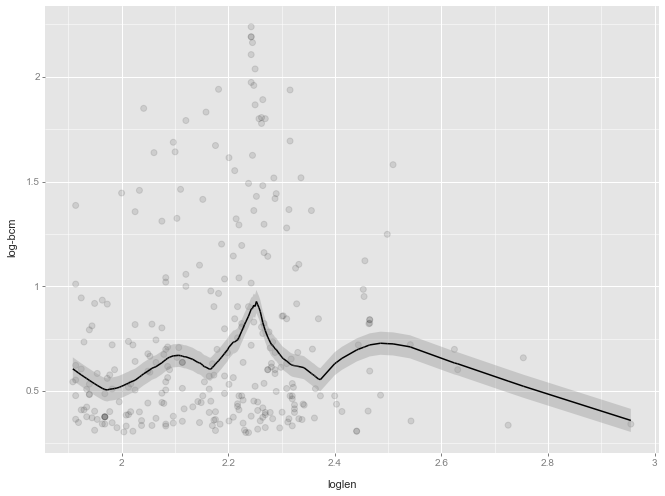

<ggplot: (8735717056958)>


In [9]:
p = ggplot(d, aes(x='loglen', y='log-bcm')) \
        + geom_point(alpha=0.1) \
        + geom_smooth(method='lowess', span=1/5.)
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).mean()
  y = pd.rolling_mean(y, window)


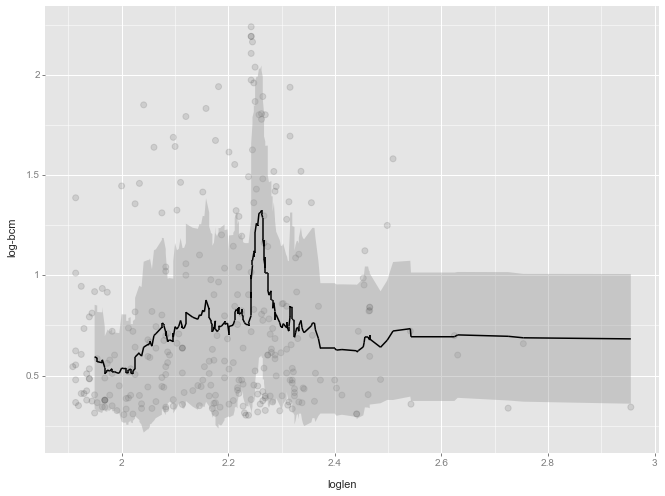

<ggplot: (-9223363300952537905)>


In [10]:
p = ggplot(d, aes(x='loglen', y='log-bcm')) \
        + geom_point(alpha=0.1) \
        + geom_smooth(method='ma', window=25)
print(p)

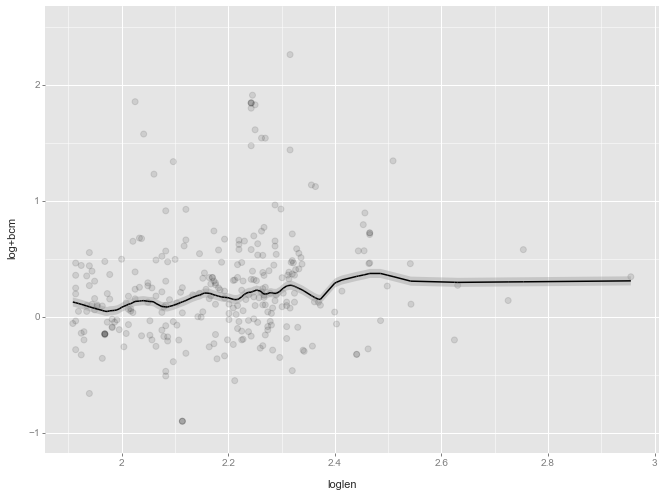

<ggplot: (8735901100387)>


In [11]:
p = ggplot(d, aes(x='loglen', y='log+bcm')) \
        + geom_point(alpha=0.1) \
        + geom_smooth(method='lowess', span=1/5.) \
        + scale_y_continuous(limits=(-1,2.5))
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).mean()
  y = pd.rolling_mean(y, window)


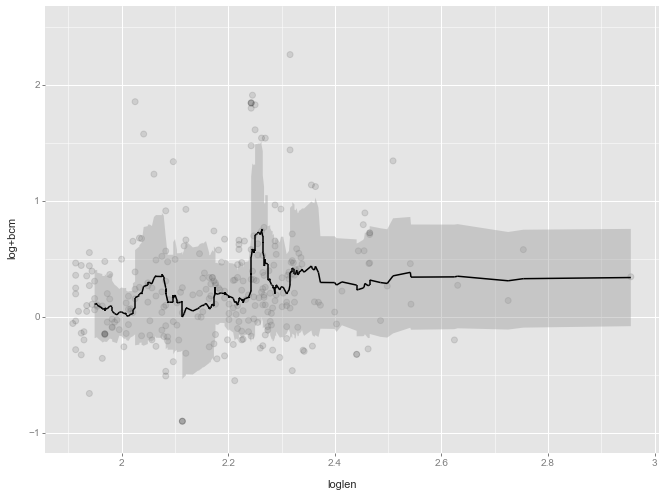

<ggplot: (-9223363300953698893)>


In [12]:
p = ggplot(d, aes(x='loglen', y='log+bcm')) \
        + geom_point(alpha=0.1) \
        + geom_smooth(method='ma', window=25) \
        + scale_y_continuous(limits=(-1,2.5))
print(p)

In [13]:
d = dfa[(dfa['UTR_length'] > 80)
        & (dfa['ratio_ATCACG'] > 2)
        & (dfa['offset'] == 200)
        & (dfa['win'] == 80)][['TSS', 'gene', 'UTR_length', 'ratio_ATCACG','ratio_CGATGT']].copy()
d['log-bcm'] = np.log10(d['ratio_ATCACG'])
d['log+bcm'] = np.log10(d['ratio_CGATGT'])
d['loglen'] = np.log10(d['UTR_length'])


In [14]:
d[d['gene'] == 'rpoS']

,TSS,gene,UTR_length,ratio_ATCACG,ratio_CGATGT,log-bcm,log+bcm,loglen
2317,2868118,rpoS,567,4.558824,3.783505,0.658853,0.577894,2.753583


In [14]:
#d.to_csv('../../results/redux/d_offset200_win80_ratio2.csv', sep='\t')

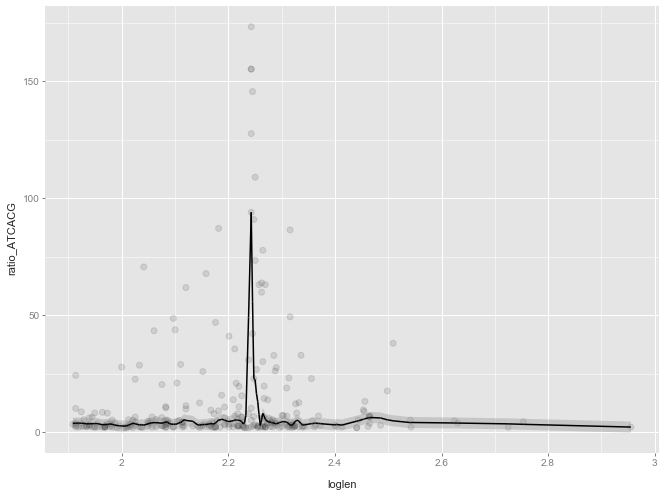

<ggplot: (-9223363300952519943)>


In [15]:
p = ggplot(d, aes(x='loglen', y='ratio_ATCACG')) \
        + geom_point(alpha=0.1) \
        + geom_smooth(method='lowess', span=1/17.)
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
  y = pd.rolling_mean(y, window)


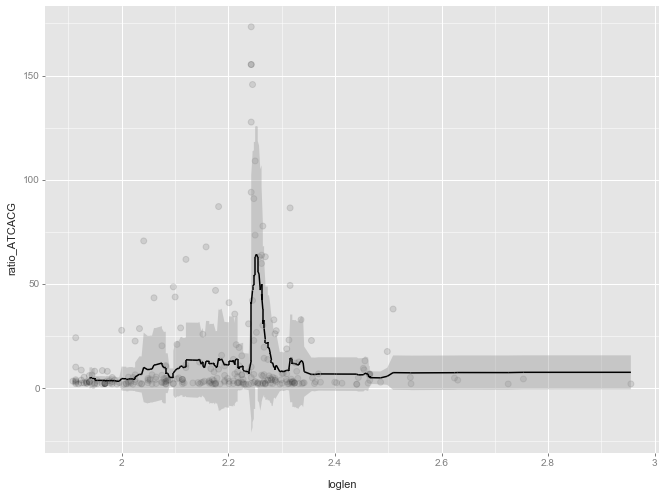

<ggplot: (8735902227355)>


In [16]:
p = ggplot(d, aes(x='loglen', y='ratio_ATCACG')) \
        + geom_point(alpha=0.1) \
        + geom_smooth(method='ma', window=20)
print(p)

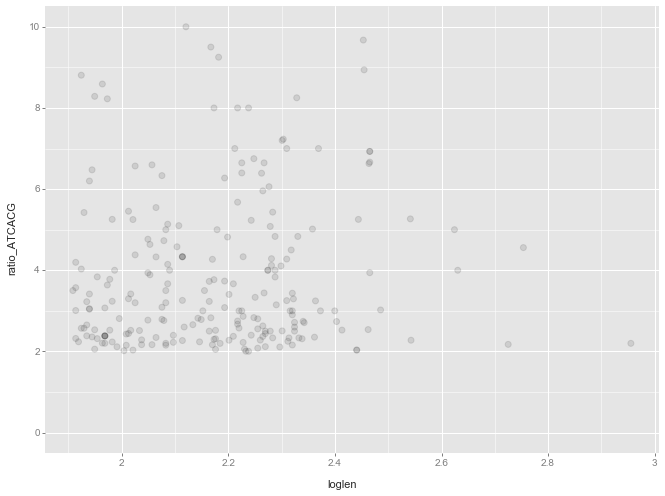

<ggplot: (-9223363300952520083)>


In [17]:
p = ggplot(d, aes(x='loglen', y='ratio_ATCACG')) \
        + geom_point(alpha=0.1) \
        + scale_y_continuous(limits=(0,10))
print(p)

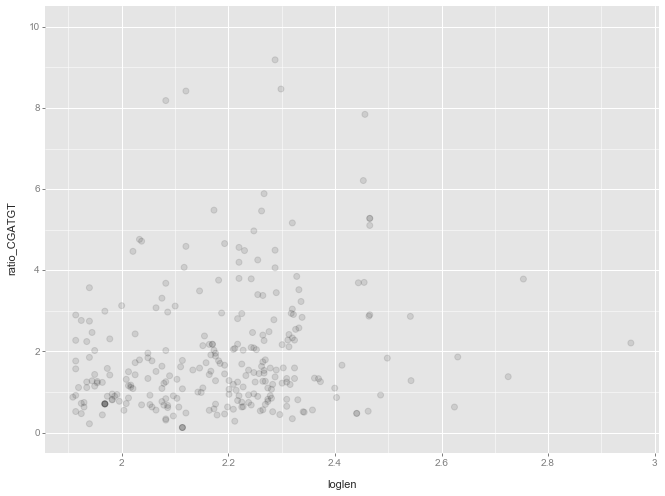

<ggplot: (8735901096929)>


In [18]:
p = ggplot(d, aes(x='loglen', y='ratio_CGATGT')) \
        + geom_point(alpha=0.1) \
        + scale_y_continuous(limits=(0,10))
print(p)

In [19]:
dfa[(dfa['gene'] == 'fadE')][[
        'TSS', 'gene', 'strand', 'UTR_length', 
        'ratio_ATCACG', 'ratio_ACAGTG', 'ratio_CGATGT', 'ratio_GCCAAT',
        'win', 'offset'
    ]]

,TSS,gene,strand,UTR_length,ratio_ATCACG,ratio_ACAGTG,ratio_CGATGT,ratio_GCCAAT,win,offset
195,243406,fadE,-,103,0.600000,0.272727,0.767347,0.562500,50,150
195,243406,fadE,-,103,0.750000,0.653846,0.823333,0.775194,80,150
195,243406,fadE,-,103,0.750000,0.777778,0.848765,0.829684,100,150
195,243406,fadE,-,103,0.789474,0.529412,0.813653,0.925217,200,150
195,243406,fadE,-,103,0.666667,0.500000,0.770492,0.718631,50,200
195,243406,fadE,-,103,0.818182,0.894737,0.812500,0.934579,80,200
195,243406,fadE,-,103,0.818182,0.840000,0.811209,0.963277,100,200
195,243406,fadE,-,103,0.882353,0.642857,0.807692,1.074747,200,200
195,243406,fadE,-,103,0.600000,0.200000,0.632997,0.790795,50,300
195,243406,fadE,-,103,0.818182,0.500000,0.713873,1.060071,80,300


In [20]:
d = dfa[(dfa['UTR_length'] > 80)
        & (dfa['ratio_ATCACG'] > 2)][[
            'TSS', 'gene', 'UTR_length', 
            'ratio_ATCACG','ratio_CGATGT', 'offset', 'win']].copy()
d['log-bcm'] = np.log10(d['ratio_ATCACG'])
d['log+bcm'] = np.log10(d['ratio_CGATGT'])
d['loglen'] = np.log10(d['UTR_length'])


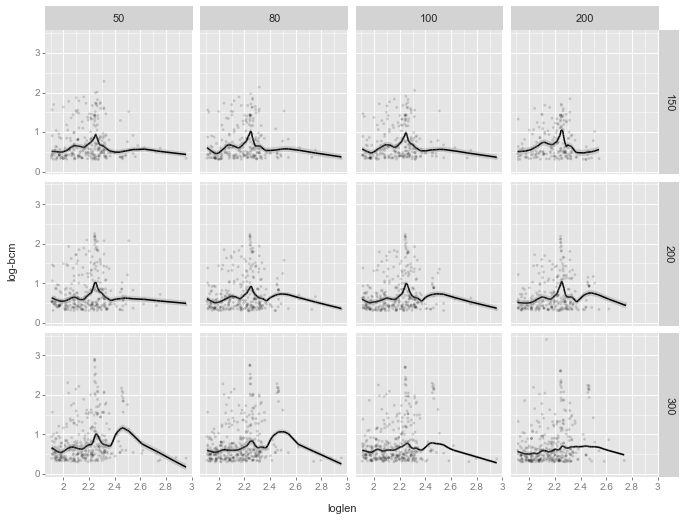

<ggplot: (8735902227646)>


In [21]:
p = ggplot(d, aes(x='loglen', y='log-bcm')) \
        + geom_point(alpha=0.1, size=1) \
        + geom_smooth(method='lowess', span=1/5.) \
        + facet_grid('offset ~ win')
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
  y = pd.rolling_mean(y, window)


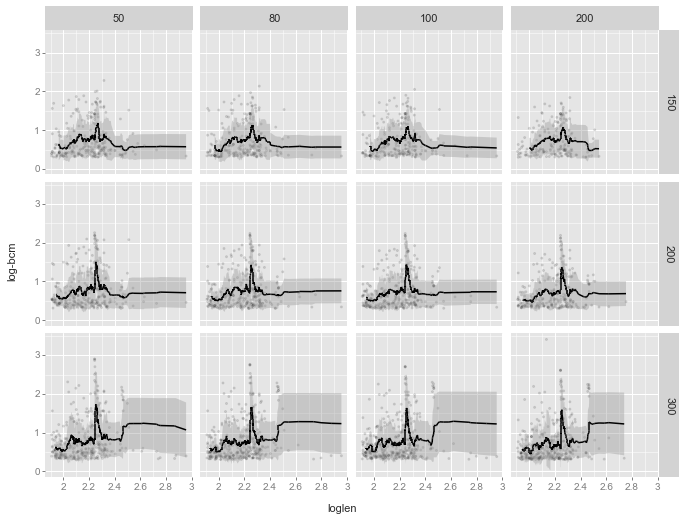

<ggplot: (-9223363300954013892)>


In [22]:
p = ggplot(d, aes(x='loglen', y='log-bcm')) \
        + geom_point(alpha=0.1, size=1) \
        + geom_smooth(method='ma', window=20) \
        + facet_grid('offset ~ win')
print(p)

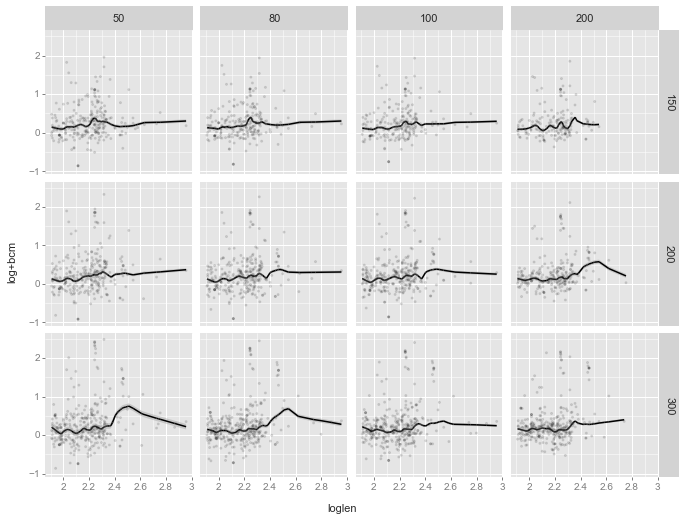

<ggplot: (8735902227569)>


In [23]:
p = ggplot(d, aes(x='loglen', y='log+bcm')) \
        + geom_point(alpha=0.1, size=1) \
        + geom_smooth(method='lowess', span=1/5.) \
        + facet_grid('offset ~ win')
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
  y = pd.rolling_mean(y, window)


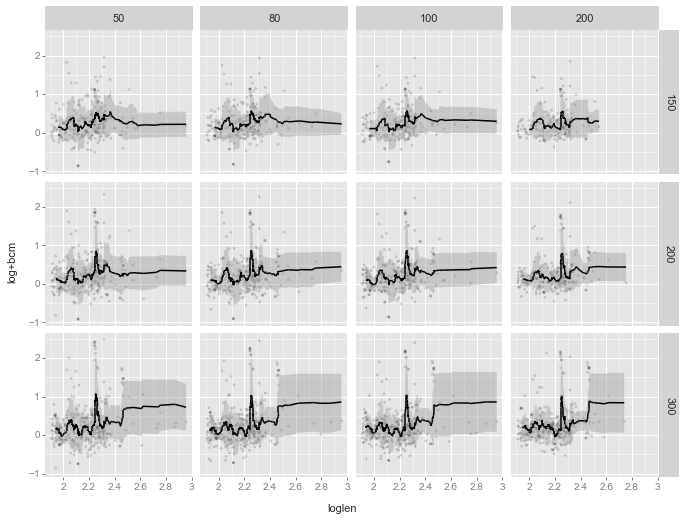

<ggplot: (-9223363300953630460)>


In [24]:
p = ggplot(d, aes(x='loglen', y='log+bcm')) \
        + geom_point(alpha=0.1, size=1) \
        + geom_smooth(method='ma', window=20) \
        + facet_grid('offset ~ win')
print(p)

## Long UTRs

In [25]:
d = dfa[(dfa['UTR_length'] > 80)
        & (dfa['UTR_length'] < 600)
        & (dfa['ratio_ATCACG'] > 2)
        & (dfa['offset'] == 200)
        & (dfa['win'] == 80)][['TSS', 'gene', 'UTR_length', 'ratio_ATCACG','ratio_CGATGT']].copy()
d['log-bcm'] = np.log2(d['ratio_ATCACG'])
d['log+bcm'] = np.log2(d['ratio_CGATGT'])
d['loglen'] = np.log2(d['UTR_length'])
d['diff'] = d['log-bcm'] - d['log+bcm']

d1 = d[['UTR_length', 'loglen', 'log-bcm']].rename(columns={'log-bcm': 'logratio'})
d1['bcm'] = '-'
d2 = d[['UTR_length', 'loglen', 'log+bcm']].rename(columns={'log+bcm': 'logratio'})
d2['bcm'] = '+'

_d = pd.concat([d1, d2])

In [26]:
d[d['gene'] == 'rpoS']

,TSS,gene,UTR_length,ratio_ATCACG,ratio_CGATGT,log-bcm,log+bcm,loglen,diff
2317,2868118,rpoS,567,4.558824,3.783505,2.188662,1.919723,9.147205,0.268938


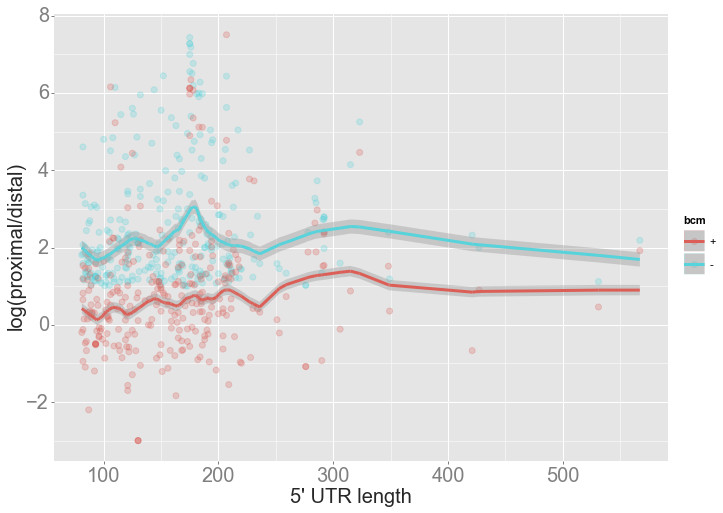

<ggplot: (8735900809855)>


In [27]:
p = ggplot(_d, aes(x='UTR_length', y='logratio', color='bcm')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='lowess', span=1/5., size=3) \
        + xlab("5' UTR length") \
        + ylab("log(proximal/distal)") \
        + theme(axis_title=element_text(size=20),
                axis_text=element_text(size=20))
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).mean()
  y = pd.rolling_mean(y, window)


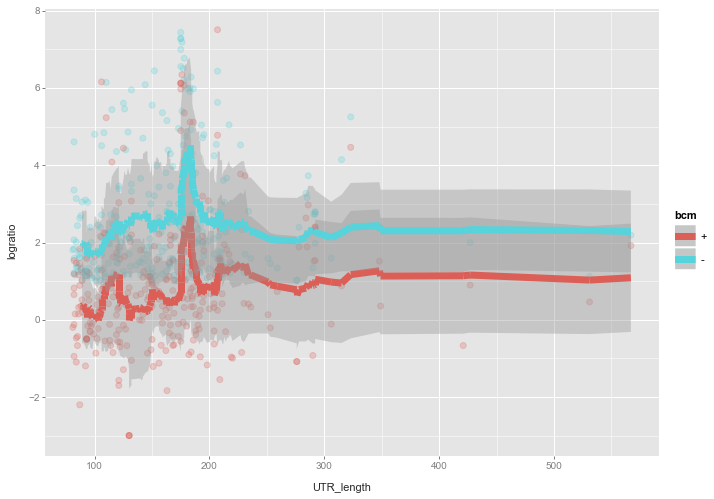

<ggplot: (-9223363300952522012)>


In [28]:
p = ggplot(_d, aes(x='UTR_length', y='logratio', color='bcm')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='ma', level=0.9, window=25, size=7)
print(p)

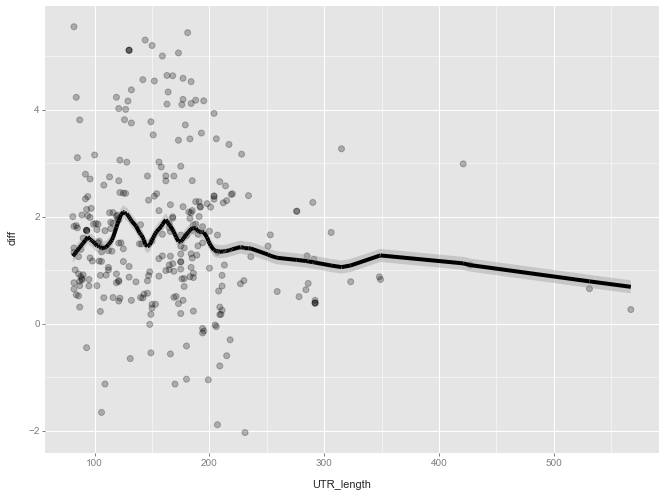

<ggplot: (-9223363300953983081)>


In [29]:
p = ggplot(d, aes(x='UTR_length', y='diff')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='lowess', span=1/5., size=4)
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=35).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=35).mean()
  y = pd.rolling_mean(y, window)


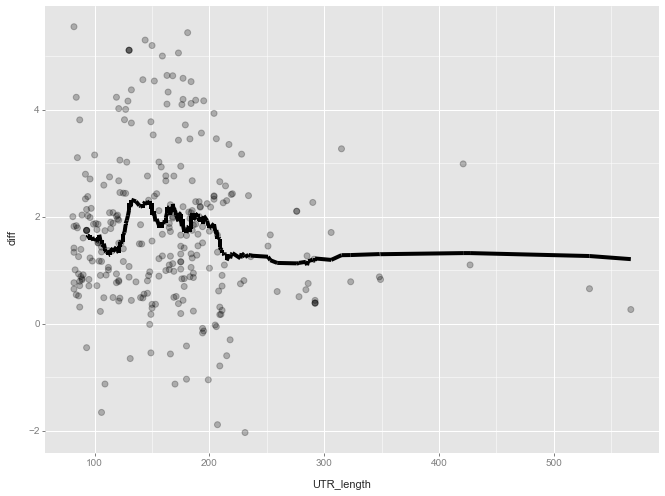

<ggplot: (-9223363301062477806)>


In [30]:
p = ggplot(d, aes(x='UTR_length', y='diff')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='ma', se=False, window=35, size=4)
print(p)

## Replicate 2

In [31]:
d = dfa[(dfa['UTR_length'] > 80)
        & (dfa['UTR_length'] < 600)
        & (dfa['ratio_ACAGTG'] > 2)
        & (dfa['offset'] == 200)
        & (dfa['win'] == 80)][['TSS', 'gene', 'UTR_length', 'ratio_ACAGTG','ratio_GCCAAT']].copy()
d['log-bcm'] = np.log10(d['ratio_ACAGTG'])
d['log+bcm'] = np.log10(d['ratio_GCCAAT'])
d['loglen'] = np.log10(d['UTR_length'])
d['diff'] = d['log-bcm'] - d['log+bcm']

d1 = d[['UTR_length', 'loglen', 'log-bcm']].rename(columns={'log-bcm': 'logratio'})
d1['bcm'] = '-'
d2 = d[['UTR_length', 'loglen', 'log+bcm']].rename(columns={'log+bcm': 'logratio'})
d2['bcm'] = '+'

_d = pd.concat([d1, d2])

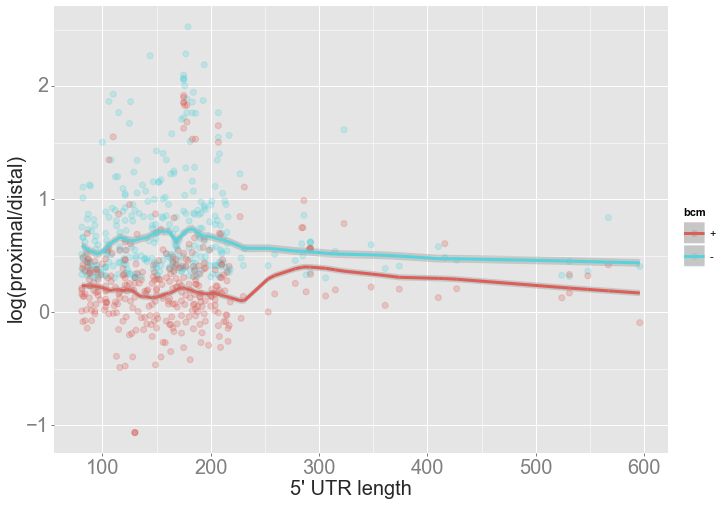

<ggplot: (8735901116508)>


In [32]:
p = ggplot(_d, aes(x='UTR_length', y='logratio', color='bcm')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='lowess', span=1/5., size=3) \
        + xlab("5' UTR length") \
        + ylab("log(proximal/distal)") \
        + theme(axis_title=element_text(size=20),
                axis_text=element_text(size=20))
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).mean()
  y = pd.rolling_mean(y, window)


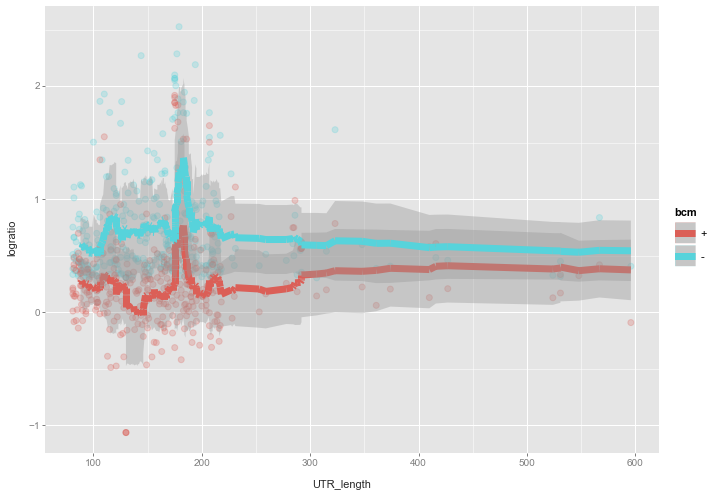

<ggplot: (8735900995269)>


In [33]:
p = ggplot(_d, aes(x='UTR_length', y='logratio', color='bcm')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='ma', level=0.9, window=25, size=7)
print(p)

## Short UTRs

In [34]:
d = dfa[(dfa['UTR_length'] < 80)
        & (dfa['UTR_length'] > 0)
        & (dfa['offset'] == 200)
        & (dfa['win'] == 80)][['TSS', 'gene', 'UTR_length', 'ratio_ATCACG','ratio_CGATGT']].copy()
d['log-bcm'] = np.log10(d['ratio_ATCACG'])
d['log+bcm'] = np.log10(d['ratio_CGATGT'])
d['loglen'] = np.log10(d['UTR_length'])
d['diff'] = d['log-bcm'] - d['log+bcm']


d1 = d[['UTR_length', 'loglen', 'log-bcm']].rename(columns={'log-bcm': 'logratio'})
d1['bcm'] = '-'
d2 = d[['UTR_length', 'loglen', 'log+bcm']].rename(columns={'log+bcm': 'logratio'})
d2['bcm'] = '+'

_d = pd.concat([d1, d2])

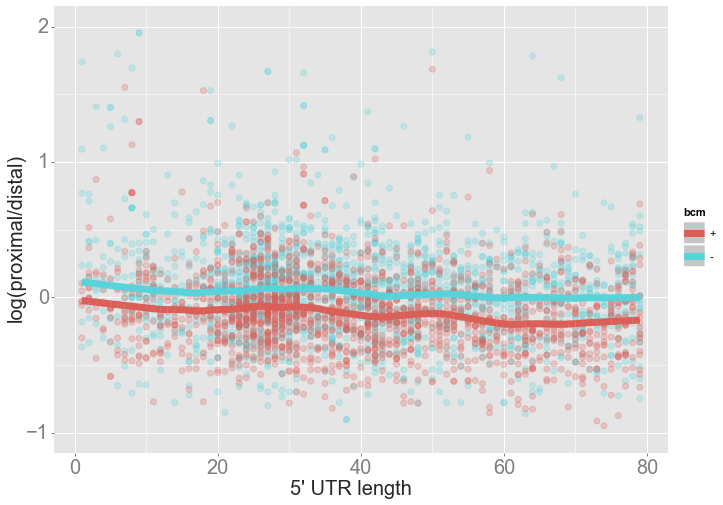

<ggplot: (8735792311030)>


In [35]:
p = ggplot(_d, aes(x='UTR_length', y='logratio', color='bcm')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='lowess', span=1/5., size=7) \
        + scale_y_continuous(limits=(-1,2)) \
        + xlab("5' UTR length") \
        + ylab("log(proximal/distal)") \
        + theme(axis_title=element_text(size=20),
                axis_text=element_text(size=20))
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).mean()
  y = pd.rolling_mean(y, window)


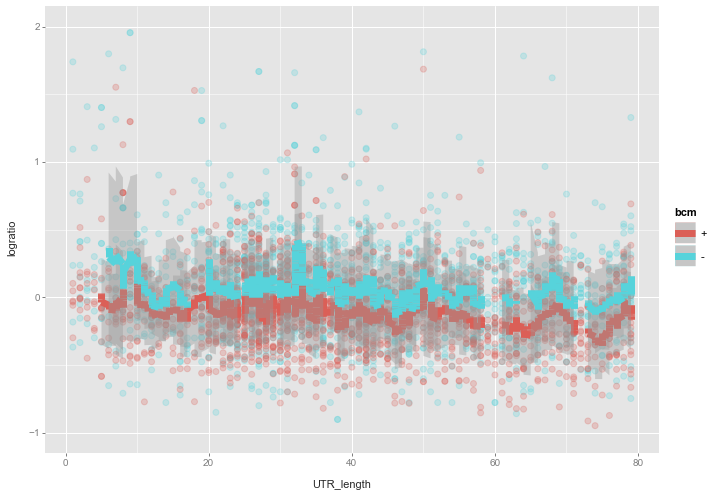

<ggplot: (-9223363300953724086)>


In [36]:
p = ggplot(_d, aes(x='UTR_length', y='logratio', color='bcm')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='ma', window=25, size=7) \
        + scale_y_continuous(limits=(-1,2))
print(p)

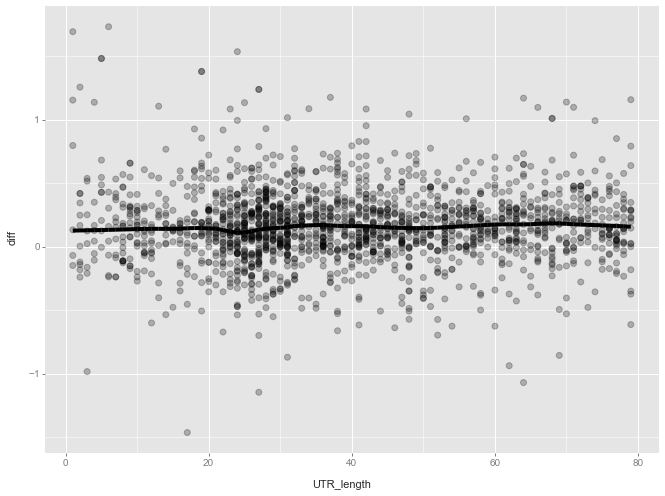

<ggplot: (-9223363300953996691)>


In [37]:
p = ggplot(d, aes(x='UTR_length', y='diff')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='lowess', span=1/5., size=4)
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=35).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=35).mean()
  y = pd.rolling_mean(y, window)


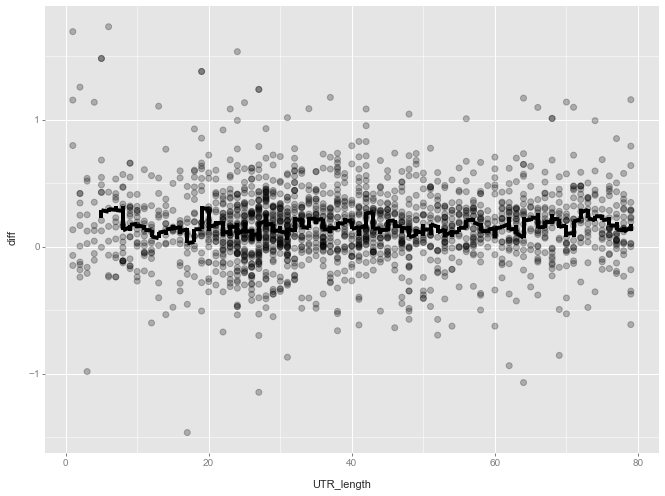

<ggplot: (-9223363300953878121)>


In [38]:
p = ggplot(d, aes(x='UTR_length', y='diff')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='ma', se=False, window=35, size=4)
print(p)

## Replicate 2

In [39]:
d = dfa[(dfa['UTR_length'] < 80)
        & (dfa['UTR_length'] > 0)
        & (dfa['offset'] == 200)
        & (dfa['win'] == 80)][['TSS', 'gene', 'UTR_length', 'ratio_ACAGTG','ratio_GCCAAT']].copy()
d['log-bcm'] = np.log2(d['ratio_ACAGTG'])
d['log+bcm'] = np.log2(d['ratio_GCCAAT'])
d['loglen'] = np.log2(d['UTR_length'])
d['diff'] = d['log-bcm'] - d['log+bcm']

d1 = d[['UTR_length', 'loglen', 'log-bcm']].rename(columns={'log-bcm': 'logratio'})
d1['bcm'] = '-'
d2 = d[['UTR_length', 'loglen', 'log+bcm']].rename(columns={'log+bcm': 'logratio'})
d2['bcm'] = '+'

_d = pd.concat([d1, d2])

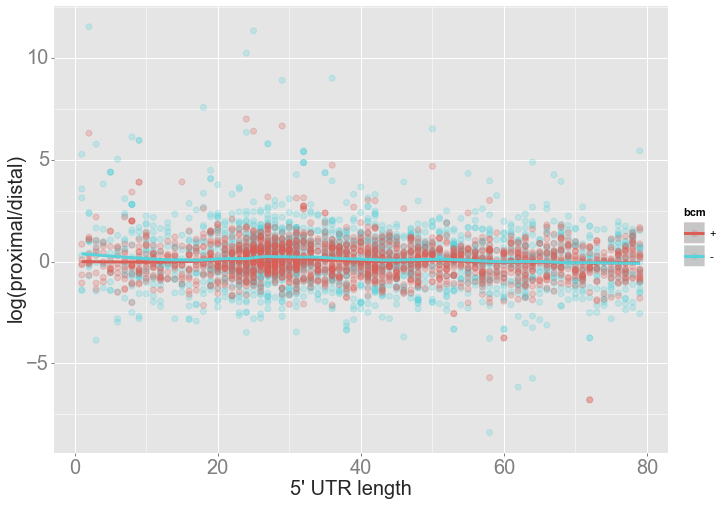

<ggplot: (-9223363300953763026)>


In [40]:
p = ggplot(_d, aes(x='UTR_length', y='logratio', color='bcm')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='lowess', span=1/5., size=3) \
        + xlab("5' UTR length") \
        + ylab("log(proximal/distal)") \
        + theme(axis_title=element_text(size=20),
                axis_text=element_text(size=20))
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=25).mean()
  y = pd.rolling_mean(y, window)


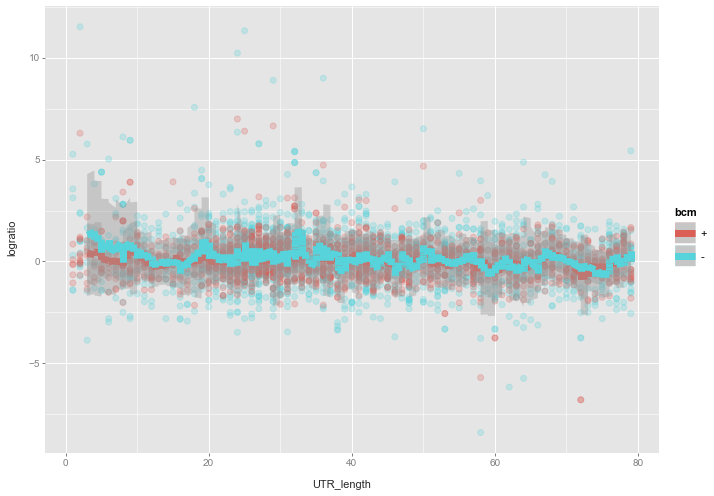

<ggplot: (-9223363300952533195)>


In [41]:
p = ggplot(_d, aes(x='UTR_length', y='logratio', color='bcm')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='ma', window=25, size=7)
print(p)

## Diff

In [42]:
d = dfa[(dfa['UTR_length'] > 80)
        & (dfa['UTR_length'] < 700)
        & (dfa['offset'] == 200)
        & (dfa['win'] == 80)][['TSS', 'gene', 'UTR_length', 'ratio_ACAGTG','ratio_GCCAAT']].copy()
d['log-bcm'] = np.log10(d['ratio_ACAGTG'])
d['log+bcm'] = np.log10(d['ratio_GCCAAT'])
d['loglen'] = np.log10(d['UTR_length'])
d['diff'] = d['log-bcm'] - d['log+bcm']
d['bcm'] = '-'
d.loc[d['ratio_ACAGTG'] > 2, 'bcm'] = '+'


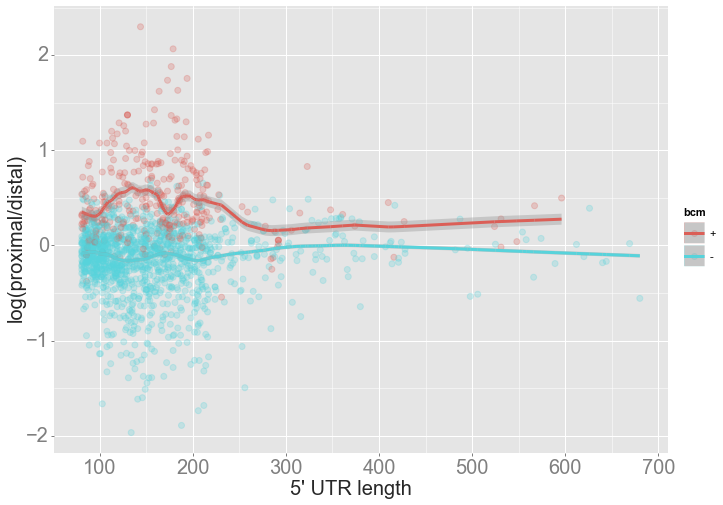

<ggplot: (8735792256141)>


In [43]:
p = ggplot(d, aes(x='UTR_length', y='diff', color='bcm')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='lowess', span=1/5., size=3) \
        + xlab("5' UTR length") \
        + ylab("log(proximal/distal)") \
        + theme(axis_title=element_text(size=20),
                axis_text=element_text(size=20))
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).mean()
  y = pd.rolling_mean(y, window)


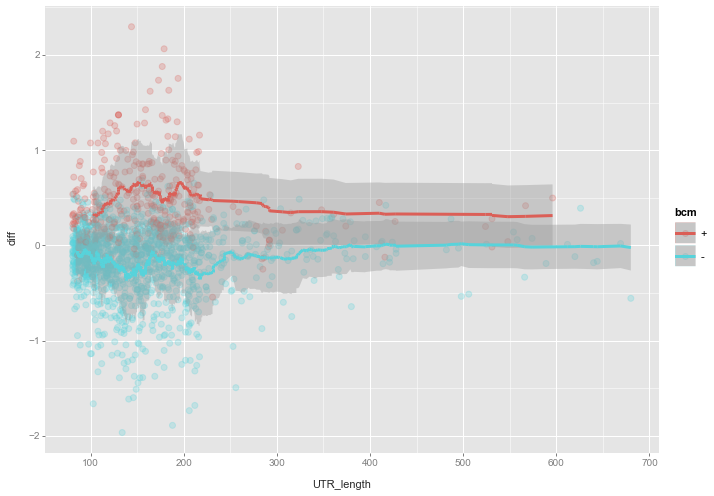

<ggplot: (8735900714444)>


In [44]:
p = ggplot(d, aes(x='UTR_length', y='diff', color='bcm')) \
        + geom_point(alpha=0.25) \
        + geom_smooth(method='ma', window=50, size=3)
print(p)

In [45]:
d = dfa[(dfa['UTR_length'] > 80)
        & (dfa['ratio_ATCACG'] > 2)
        & (dfa['offset'] == 200)
        & (dfa['win'] == 80)][['TSS', 'gene', 'UTR_length', 'ratio_ATCACG','ratio_CGATGT']].copy()
d['log-bcm'] = np.log10(d['ratio_ATCACG'])
d['log+bcm'] = np.log10(d['ratio_CGATGT'])
d['loglen'] = np.log10(d['UTR_length'])

d1 = d[['loglen', 'ratio_ATCACG']].rename(columns={'ratio_ATCACG': 'ratio'})
d1['bcm'] = '-'
d2 = d[['loglen', 'ratio_CGATGT']].rename(columns={'ratio_CGATGT': 'ratio'})
d2['bcm'] = '+'

_d = pd.concat([d1, d2])

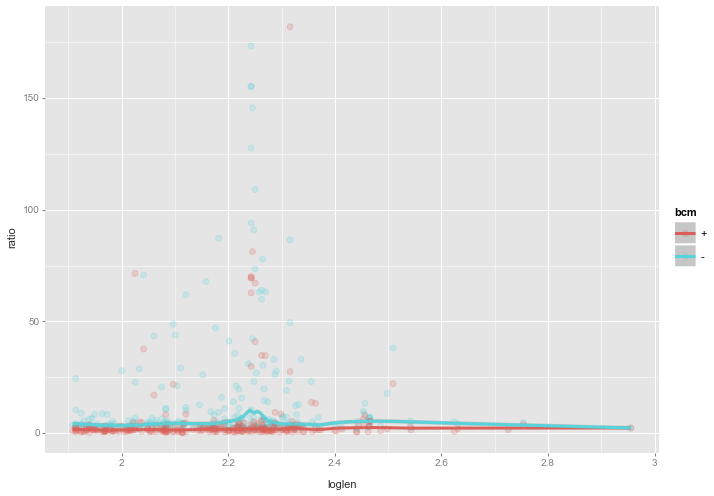

<ggplot: (8735900870201)>


In [46]:
p = ggplot(_d, aes(x='loglen', y='ratio', color='bcm')) \
        + geom_point(alpha=0.2) \
        + geom_smooth(method='lowess', span=1/5., size=3)
print(p)

/home/ilya/src/ggplot/ggplot/utils/smoothers.py:61: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).std()
  std_err = pd.rolling_std(y, window)
/home/ilya/src/ggplot/ggplot/utils/smoothers.py:62: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
  y = pd.rolling_mean(y, window)


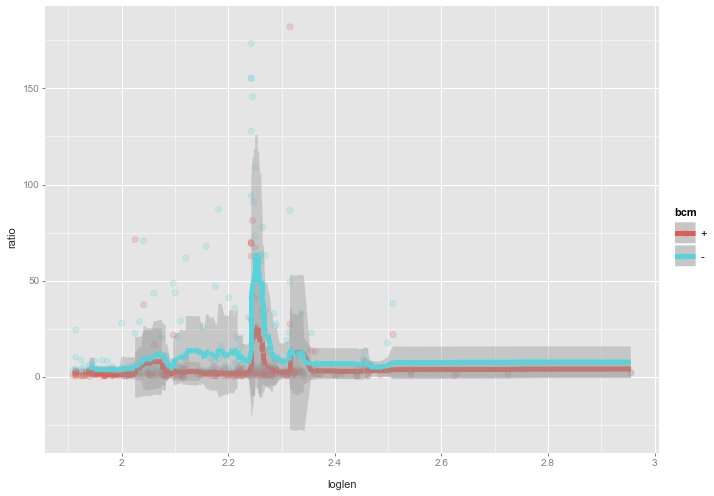

<ggplot: (8735902257037)>


In [47]:
p = ggplot(_d, aes(x='loglen', y='ratio', color='bcm')) \
        + geom_point(alpha=0.2) \
        + geom_smooth(method='ma', window=20, size=5)
print(p)

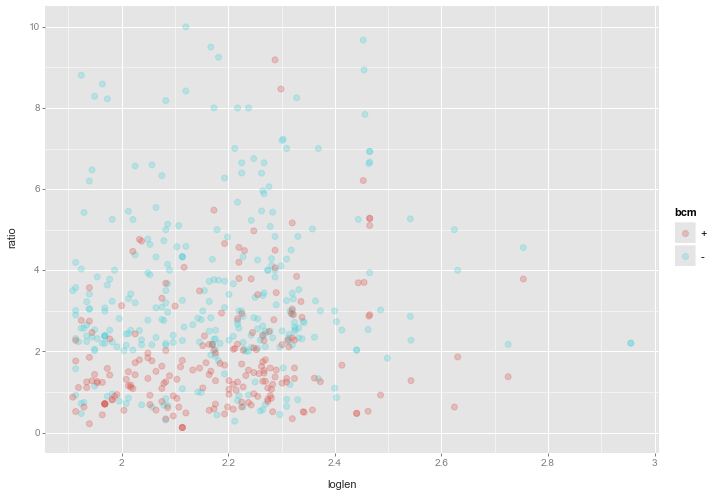

<ggplot: (-9223363300952535443)>


In [48]:
p = ggplot(_d, aes(x='loglen', y='ratio', color='bcm')) \
        + geom_point(alpha=0.3) \
        + scale_y_continuous(limits=(0,10))
print(p)

In [50]:
samples_dict = {
    's9': ['ATCACG', 'ACAGTG'],
    's9+bcm': ['CGATGT', 'GCCAAT'],
    's17': ['TTAGGC', 'GATCAG'],
    }

utr_cols = ['TSS', 'gene', 'UTR_length', 
            'ratio_ATCACG','ratio_CGATGT',
            'ratio_ACAGTG','ratio_GCCAAT']

long_utrs = dfa[(dfa['UTR_length'] > 80)
            & (dfa['UTR_length'] < 600)
            & (dfa['ratio_ACAGTG'] > 2)
            & (dfa['offset'] == 200)
            & (dfa['win'] == 80)][utr_cols].copy()
    

short_utrs = dfa[(dfa['UTR_length'] < 80)
        & (dfa['UTR_length'] > 0)
        & (dfa['offset'] == 200)
        & (dfa['win'] == 80)][utr_cols].copy()


def utr_scatter(data, samples, cond=None, save_csv=False):
    '''
    `samples`: list of sample_ids from samples_dict
    `cond`: list of conditions
    '''
    
    def mark_rho(rec):
        if rec['gene'] == 'rpoS' and rec['UTR_length'] > 500:
            return 'rpoS'
        else:
            return ''

    
    res = []
    for i,sample in enumerate(samples):
        d = data[['UTR_length', 'gene']]
        d['loglen'] = np.log10(data['UTR_length'])
        dtmp = data[['ratio_{}'.format(bc) for bc in samples_dict[sample]]]
        for barcode in samples_dict[sample]:
            dtmp[barcode] = np.log10(data['ratio_{}'.format(barcode)])
        d['logratio'] = dtmp[[bc for bc in samples_dict[sample]]].mean(axis=1)
        if cond and len(cond) == len(samples):
            d['cond'] = cond[i]
        else:
            d['cond'] = 'cond_{}'.format(i)
        d['label'] = d.apply(mark_rho, axis=1)
        res.append(d)
    df = pd.concat(res)
    if save_csv:
        df.to_csv('../../results/redux/fig_1b.df.csv', sep='\t')
    
    p = ggplot(df, aes(x='UTR_length', y='logratio', color='cond', label='label')) \
        + geom_point(alpha=0.25) \
        + geom_text(color="black", nudge_x=20) \
        + geom_smooth(method='lowess', span=1/5., size=3) \
        + xlab("5' UTR length") \
        + ylab("log(proximal/distal)") \
        + theme(axis_title=element_text(size=20),
                axis_text=element_text(size=20))
    print(p)

/home/ilya/.venv/pydata/lib/python3.4/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata/lib/python3.4/site-packages/ipykernel/__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata/lib/python3.4/site-packages/ipykernel/__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

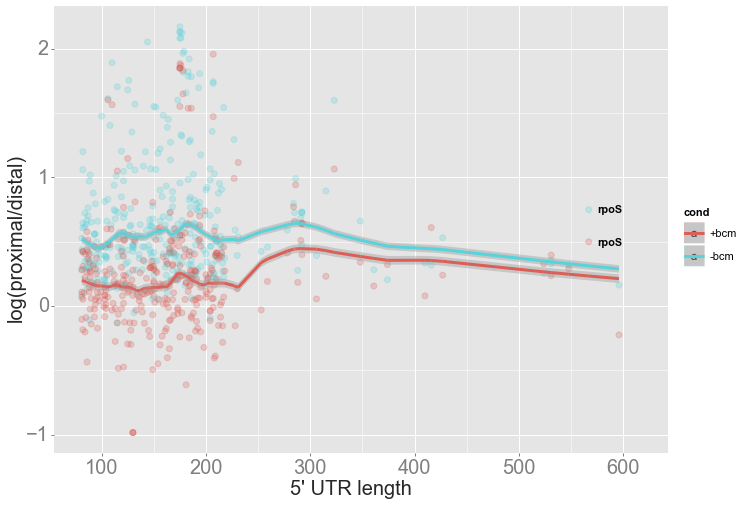

<ggplot: (8735792384958)>


In [51]:
utr_scatter(long_utrs,  ['s9', 's9+bcm'], cond=['-bcm', '+bcm'], save_csv=True)

/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

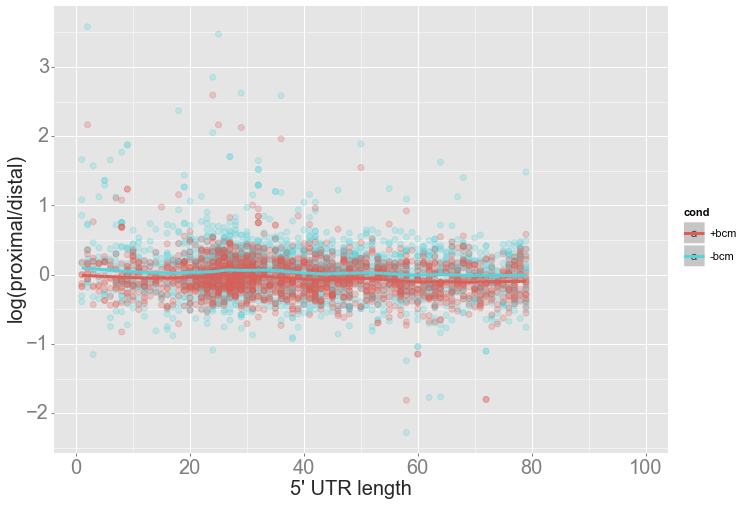

<ggplot: (-9223363267839446482)>


In [73]:
utr_scatter(short_utrs,  ['s9', 's9+bcm'], cond=['-bcm', '+bcm'])

In [78]:
samples_dict = {
    's9': ['ATCACG'],
    's9+bcm': ['CGATGT'],
}


/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

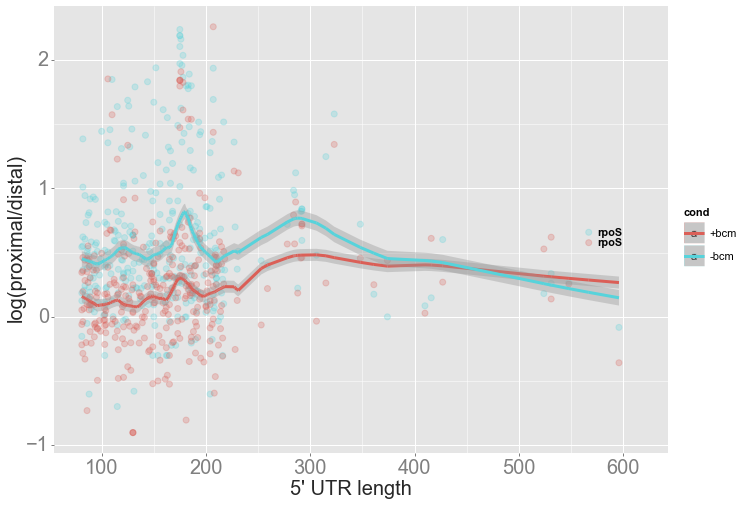

<ggplot: (8768893204565)>


In [79]:
utr_scatter(long_utrs,  ['s9', 's9+bcm'], cond=['-bcm', '+bcm'])

/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

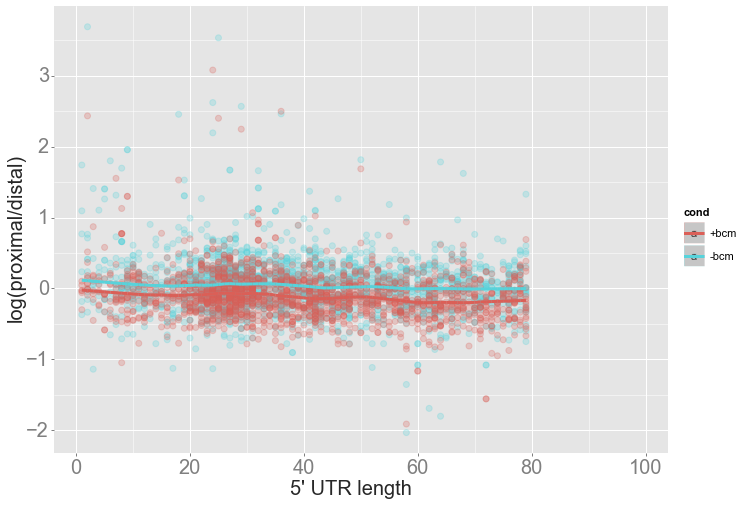

<ggplot: (8769015399081)>


In [80]:
utr_scatter(short_utrs,  ['s9', 's9+bcm'], cond=['-bcm', '+bcm'])

In [81]:
samples_dict = {
    's9': ['ACAGTG'],
    's9+bcm': ['GCCAAT'],
}


/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

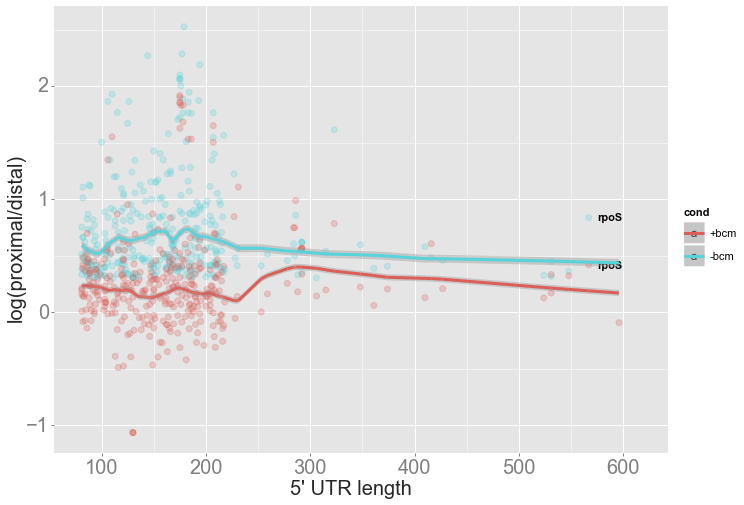

<ggplot: (8768893257564)>


In [82]:
utr_scatter(long_utrs,  ['s9', 's9+bcm'], cond=['-bcm', '+bcm'])

/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata3/lib/python3.4/site-packages/ipykernel/__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

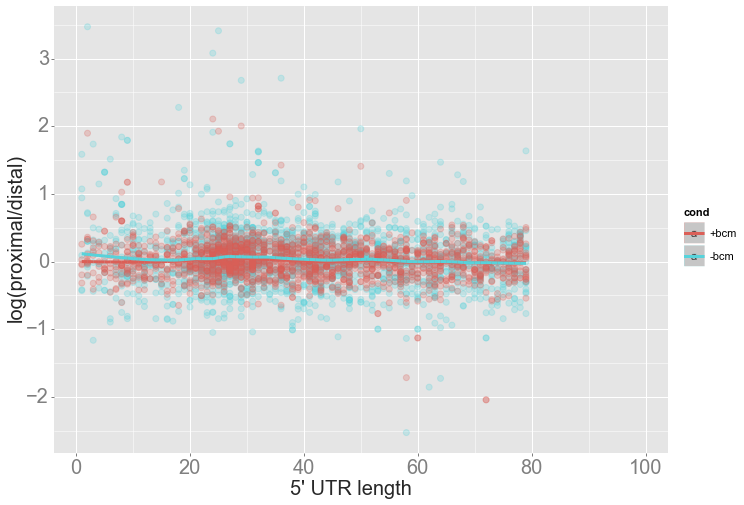

<ggplot: (-9223363267971729092)>


In [83]:
utr_scatter(short_utrs,  ['s9', 's9+bcm'], cond=['-bcm', '+bcm'])